In [1]:
#Description : this program is Fibonacci retracement levels and macd to indicate when to buy stock and sell

In [2]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [10]:
df = pd.read_csv("aapl_csv")

In [13]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

In [14]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
2018-12-31,2018-12-31,39.632500,39.840000,39.119999,39.435001,38.282612,140014000
2019-01-02,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.326294,148158800
2019-01-03,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.508709,365248800
2019-01-04,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.981865,234428400
2019-01-07,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.901768,219111200
...,...,...,...,...,...,...,...
2020-12-23,2020-12-23,132.160004,132.429993,130.779999,130.960007,130.157608,88223700
2020-12-24,2020-12-24,131.320007,133.460007,131.100006,131.970001,131.161407,54930100
2020-12-28,2020-12-28,133.990005,137.339996,133.509995,136.690002,135.852509,124486200
2020-12-29,2020-12-29,138.050003,138.789993,134.339996,134.869995,134.043640,121047300


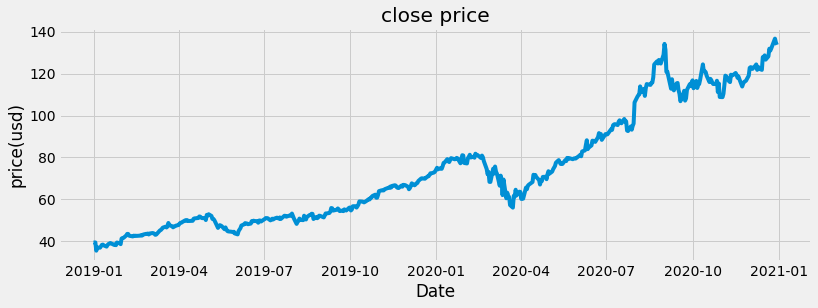

In [15]:
#plot the data
plt.figure(figsize=(12,4))
plt.plot(df.Close)
plt.title("close price")
plt.xlabel("Date")
plt.ylabel("price(usd)")
plt.show()

In [16]:
# calculate the fibonacci levels
max_price = df["Close"].max()
min_price = df["Close"].min()

difference = max_price - min_price
first_level = max_price - difference * 0.236
second_level = max_price - difference * 0.382
third_level = max_price - difference * 0.5
forth_level = max_price - difference * 0.618


In [17]:
# calculate the macd line and signal line indicator
ShortEMA = df.Close.ewm(span = 12,adjust = False).mean()
LongEMA = df.Close.ewm(span = 26, adjust = False).mean()

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span= 9,adjust = False).mean()


Text(0, 0.5, 'MACD')

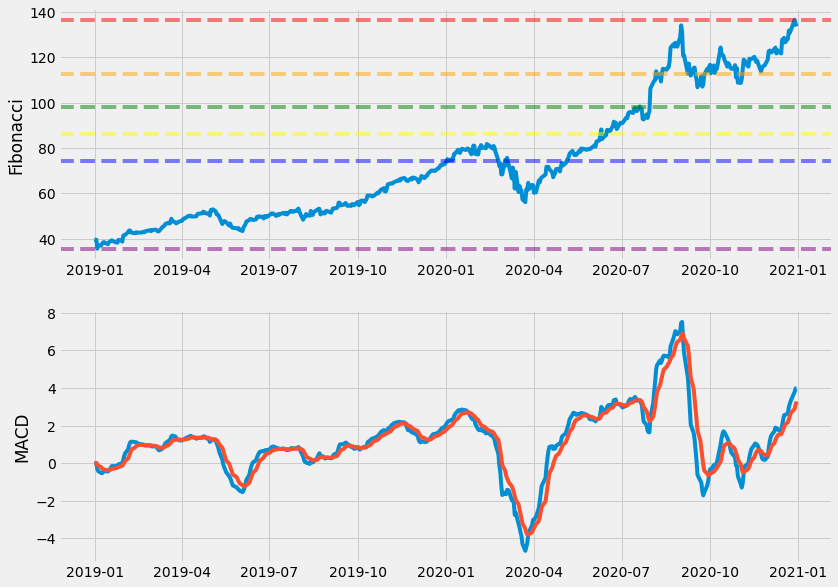

In [19]:
#plot the fibonacci level with the close price  and the macd  and signal line
new_df = df

# plot the fibonacci levels
plt.figure(figsize = (12.33,9.5))
plt.subplot(2,1,1)
plt.plot(new_df.index,new_df['Close'])
plt.axhline(max_price, linestyle = '--',alpha = 0.5, color = 'red')
plt.axhline(first_level, linestyle = '--',alpha = 0.5, color = 'orange')
plt.axhline(second_level, linestyle = '--',alpha = 0.5, color = 'green')
plt.axhline(third_level, linestyle = '--',alpha = 0.5, color = 'yellow')
plt.axhline(forth_level, linestyle = '--',alpha = 0.5, color = 'blue')
plt.axhline(min_price, linestyle = '--',alpha = 0.5, color = 'purple')
plt.ylabel('Fibonacci')


#plot the macd and signal line
plt.subplot(2,1,2)
plt.plot(new_df.index,MACD)
plt.plot(new_df.index,signal)
plt.ylabel("MACD")


In [22]:
# create a new coloum for dataframe
df['MACD']= MACD
df['Signal line']= signal

In [23]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line
2018-12-31,2018-12-31,39.632500,39.840000,39.119999,39.435001,38.282612,140014000,0.000000,0.000000
2019-01-02,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.326294,148158800,0.003590,0.000718
2019-01-03,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.508709,365248800,-0.307343,-0.060894
2019-01-04,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.981865,234428400,-0.426394,-0.133994
2019-01-07,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.901768,219111200,-0.521390,-0.211473
...,...,...,...,...,...,...,...,...,...
2020-12-23,2020-12-23,132.160004,132.429993,130.779999,130.960007,130.157608,88223700,3.154518,2.500894
2020-12-24,2020-12-24,131.320007,133.460007,131.100006,131.970001,131.161407,54930100,3.323474,2.665410
2020-12-28,2020-12-28,133.990005,137.339996,133.509995,136.690002,135.852509,124486200,3.794496,2.891227
2020-12-29,2020-12-29,138.050003,138.789993,134.339996,134.869995,134.043640,121047300,3.975103,3.108002


In [27]:
# create a function to be used in our strategy to get the upper fibonacci level and the lower fibonacci level of current price
def getlevels(price):
    if price>= first_level:
        return(max_price,first_level)
    elif price >= second_level:
        return(first_level,second_level)
    elif price >= third_level:
        return(second_level,third_level)
    elif price >= forth_level:
        return (third_level,forth_level)
    else:
        return(forth_level,min_price)

In [31]:
# create a function for the trading strategy

# The strategy
# when the signal line crossed above the macd line and the current price crossed above or below the last fibonacci level then buy
# when the signal line crossed below the macd line and the current price crossed above or below the last fibonacci level then sell
#Never sell at a price thats lower then i bought

def strategy(df):
    buy_list = []
    sell_list = []
    flag = 0
    last_buy_price = 0
    
    for i in range(0,df.shape[0]):
        price = df['Close'][i]
        if i == 0:
            upper_lvl,lower_lvl = getlevels(price)
            buy_list.append(np.nan)
            sell_list.append(np.nan)
        elif price >= upper_lvl or price <= lower_lvl:
            if df["Signal line"][i] > df['MACD'][i] and flag == 0:
                
                last_buy_price = price
                buy_list.append(price)
                sell_list.append(np.nan)
                flag = 1
            elif df["Signal line"][i] < df['MACD'][i] and flag == 1 and price >= last_buy_price:
                buy_list.append(np.nan)
                sell_list.append(price)
                flag = 0
            else:
                buy_list.append(np.nan)
                sell_list.append(np.nan)
                
        else:
            
            buy_list.append(np.nan)
            sell_list.append(np.nan)
        upper_lvl,lower_lvl = getlevels(price)
    return buy_list, sell_list
                
                
                             

In [32]:
# create a buy and sell coloumns
buy, sell = strategy(df)
df["buy_Signal_price"]= buy
df["sell_Signal_price"]= sell
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,buy_Signal_price,sell_Signal_price
2018-12-31,2018-12-31,39.632500,39.840000,39.119999,39.435001,38.282612,140014000,0.000000,0.000000,NaN,NaN
2019-01-02,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.326294,148158800,0.003590,0.000718,NaN,NaN
2019-01-03,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.508709,365248800,-0.307343,-0.060894,35.547501,NaN
2019-01-04,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.981865,234428400,-0.426394,-0.133994,NaN,NaN
2019-01-07,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.901768,219111200,-0.521390,-0.211473,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,2020-12-23,132.160004,132.429993,130.779999,130.960007,130.157608,88223700,3.154518,2.500894,NaN,NaN
2020-12-24,2020-12-24,131.320007,133.460007,131.100006,131.970001,131.161407,54930100,3.323474,2.665410,NaN,NaN
2020-12-28,2020-12-28,133.990005,137.339996,133.509995,136.690002,135.852509,124486200,3.794496,2.891227,NaN,136.690002
2020-12-29,2020-12-29,138.050003,138.789993,134.339996,134.869995,134.043640,121047300,3.975103,3.108002,NaN,NaN


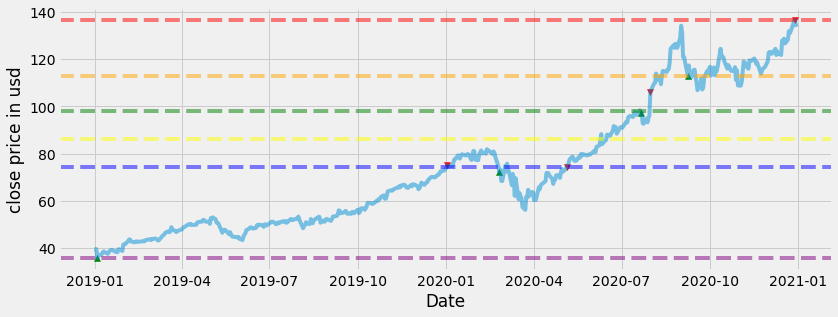

In [35]:
# plot the fibonancci level along with the close price and with buy and sell signals

new_df = df

# plot the fibonacci levels
plt.figure(figsize = (12.33,4.5))

plt.plot(new_df.index,new_df['Close'],alpha = 0.5)
plt.scatter(new_df.index,new_df["buy_Signal_price"], color = "green", marker = '^', alpha = 1)
plt.scatter(new_df.index,new_df["sell_Signal_price"], color = "red", marker = 'v', alpha = 1)
plt.axhline(max_price, linestyle = '--',alpha = 0.5, color = 'red')
plt.axhline(first_level, linestyle = '--',alpha = 0.5, color = 'orange')
plt.axhline(second_level, linestyle = '--',alpha = 0.5, color = 'green')
plt.axhline(third_level, linestyle = '--',alpha = 0.5, color = 'yellow')
plt.axhline(forth_level, linestyle = '--',alpha = 0.5, color = 'blue')
plt.axhline(min_price, linestyle = '--',alpha = 0.5, color = 'purple')
plt.ylabel('close price in usd')
plt.xlabel('Date')
plt.show()